# Problem Statement

The main purpose to  use the generation of synthetic data is that can be used for fraud detection research.

### ABOUT THE DATA SET - 

* Step: represents the day when the transaction happened.Considering the transactions for a period of 36 days (100000 transactions)

* Customer: represents the unique ID of the person who initialized the transaction. It is formed by the letter C, followed by a unique sequence of 10 numbers. wn. 

* Age is Unknown only for transactions that have the gender equal to Enterprise.
    
    The coding for the numbers is: - 
    
        - 0: less than 18 years old
        - 1: between 19 and 25 years old
        - 2: between 26 and 35 years old
        - 3: between 36 and 45 years old
        - 4: between 46 and 55 years old
        - 5: between 56 and 65 years old
        - 6: older than 65 years old


* Gender: this variable is coded as F for Female, M for Male, E for Enterprise and U for Unknown. The Unknown group has around 170 customers aged in groups 1, 2 and 3.


* Merchant: this variable represents the unique ID of the party which receives the transaction. Similar to customer ID, the sequence is formed by the letter M, followed by a series of 9 numbers. There is a total of 50 unique merchants in the dataset.


* Category: there are 15 unique categories that label the general type of the transaction: transportation, food, health, wellness and beauty, fashion, bars and restaurant, hyper, sports and toys, tech, home, hotel services, other services, contents, travel, leisure.


* Amount: represents the value of the transaction. There are only 52 values equal to 0 and no negative values.


* Fraud: a flag column coded with 0 if the transaction was clean and with 1 if the transaction was fraudulent.


* zipcodeOri and zipMerchant: these two features were removed from the dataset, as they contained a constant value of 28007, which is a postal code in Ansonville, North Carolina, United States. Therefore, the amount will be from now on expressed in

## Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the Dataset

Taking the 1st 100000 rows

In [7]:
dataset = pd.read_csv('fraud_final.csv')
dataset = dataset.iloc[:100000,:]
dataset.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0
2,0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0
3,0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0
4,0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0


# Cleaning the dataset of dummy values/variables


### Checking for redundant variables

In [8]:
zipcodeOri = list(dataset['zipcodeOri'].unique())
zipMerchant = list(dataset['zipMerchant'].unique())
gender = list(dataset['gender'].unique())
print("Unique elements of zipcodeOri Column = "+str(zipcodeOri))
print("Unique elements of zipMerchant Column = "+str(zipMerchant))
print("Unique elements of gender Column = " +str(gender))

Unique elements of zipcodeOri Column = [28007]
Unique elements of zipMerchant Column = [28007]
Unique elements of gender Column = ['M', 'F', 'E', 'U']


### Removing columns "zipcodeOri" and "zipMerchant

Columns "zipcodeOri" and "zipMerchant" have one unique value throught the data set and hence will have no impact on dependent variable which in our case is the fraud column, Removing these columns from the dataset

Dataset after removing the columns - 

In [9]:
dataset = dataset.drop(['zipcodeOri','zipMerchant'] , axis=1)
dataset.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,M,M348934600,es_transportation,4.55,0
1,0,C352968107,2,M,M348934600,es_transportation,39.68,0
2,0,C2054744914,4,F,M1823072687,es_transportation,26.89,0
3,0,C1760612790,3,M,M348934600,es_transportation,17.25,0
4,0,C757503768,5,M,M348934600,es_transportation,35.72,0


# Methods used for Plotting 

Throughout the notebook alot of graphs have been plotted with the help of combination of barplot and seaborn , to avoid repetition in code these funtions have been created - 

In [10]:
def plot_count(dataset, feature, title='', width=2 ,ht=2):
    f, ax = plt.subplots(1,1, figsize=(3*width,2*ht))
    total = float(len(dataset))
    sns.countplot(dataset[feature])
    plt.title(title, fontsize=20)
    plt.xlabel(feature, fontsize=18)
    plt.ylabel('Transaction Count', fontsize=18)
    plt.rcParams['figure.figsize'] = (3*width,2*ht)
    if (width >3) :
         plt.xticks(rotation=90, size=20)
         plt.yticks(rotation=0, size=20)   
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

In [11]:
def plot_ratio(dataset, feature1,feature2 ,title='', width=2 ,ht=2):
    sns.barplot(dataset[feature1],dataset[feature2],errwidth=0)
    if (width >3) :
        plt.xticks(rotation=90, size=20)
        plt.yticks(rotation=0, size=20)
    plt.rcParams['figure.figsize'] = (3*width,2*ht)
    plt.title(title, fontsize=20)
    plt.xlabel(feature1, fontsize=18)
    plt.ylabel(feature2, fontsize=18)
    if (width  >4) :
         plt.xticks(rotation=90, size=20)
         plt.yticks(rotation=0, size=20)   
    plt.show()

## Bar plot for GENDER distribution

From the barplot it is clear that E and U share an insignificant percentage, dropping these values

C:\Users\a7gupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


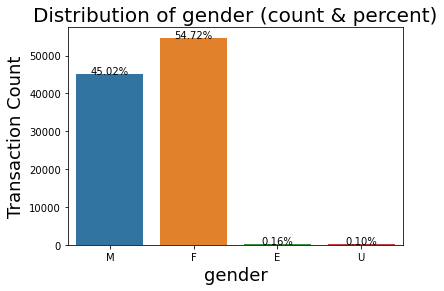

In [12]:
plot_count(dataset, 'gender', 'Distribution of gender (count & percent)', width=2 ,ht=2)

In [13]:
lists = ['E','U']
for item in lists:
    index_names = dataset[ dataset['gender'] == item].index
    dataset = dataset.drop(index_names)

# Data Analysis for GENDER

### Transacton Count based on Gender

From the barplots below its clear that Females have a higher percentage of total transaction and also are more susceptible to Frauds. Males share a lower % of transaction and also are less susceptible to fraud.

C:\Users\a7gupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


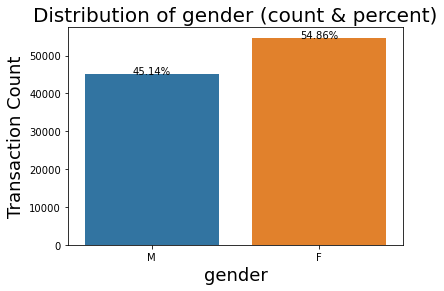

In [14]:
plot_count(dataset, 'gender', 'Distribution of gender (count & percent)', width=2 ,ht=2)

### Ratio of Fraud Counts to Total transaction Count for Males and Females

C:\Users\a7gupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


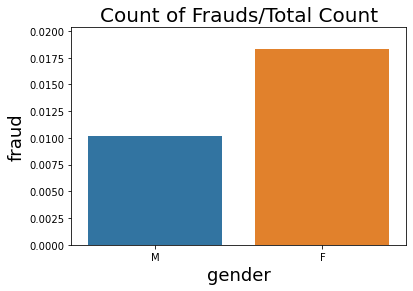

In [15]:
plot_ratio(dataset, 'gender' ,'fraud' , 'Count of Frauds/Total Count', width=2 ,ht=2)

# Data Analysis for Merchant

### Transacton Count based on Merchant

Merchants *M348934600* and *M1823072687*  share about 80% of the total transactions , when compared with Frauds per Merchant the rest of the merchants have a higher ratio of frauds. 

C:\Users\a7gupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


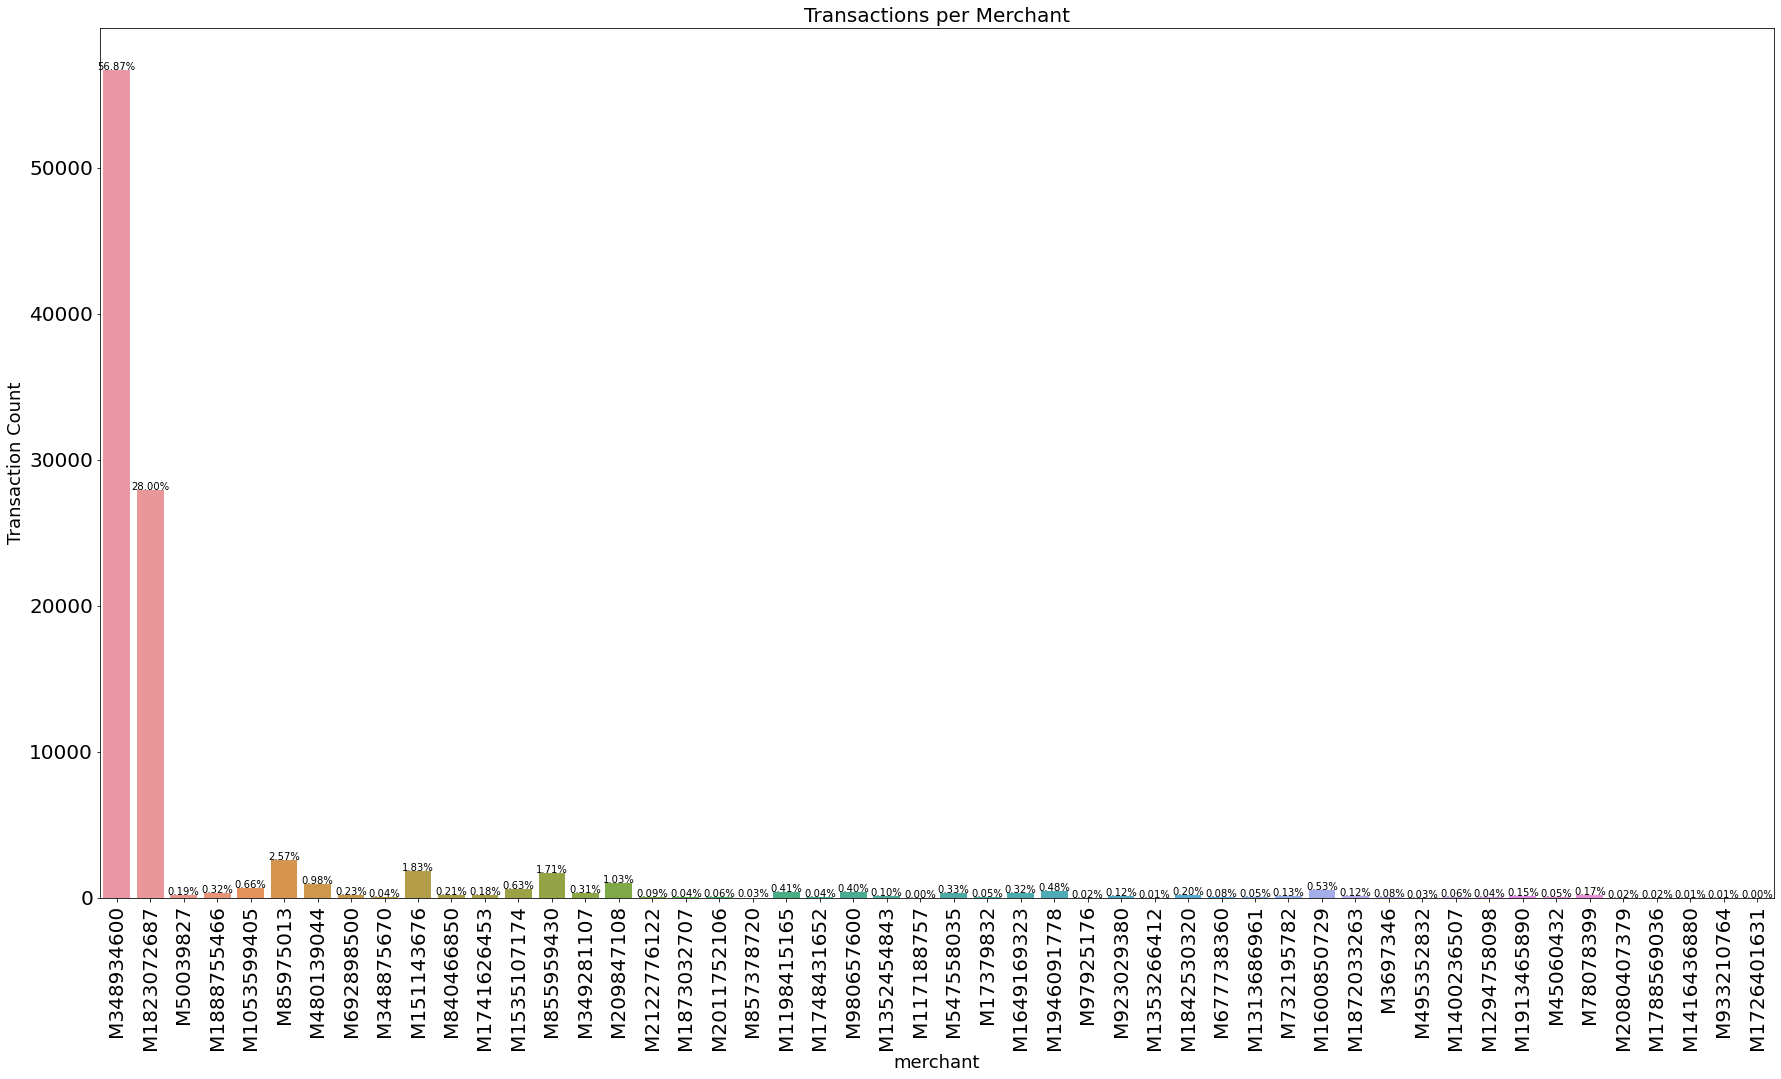

In [16]:
plot_count(dataset, 'merchant', 'Transactions per Merchant',width=10 ,ht=8)

### Ratio of Fraud Counts to Total transaction Count for Merchants

C:\Users\a7gupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


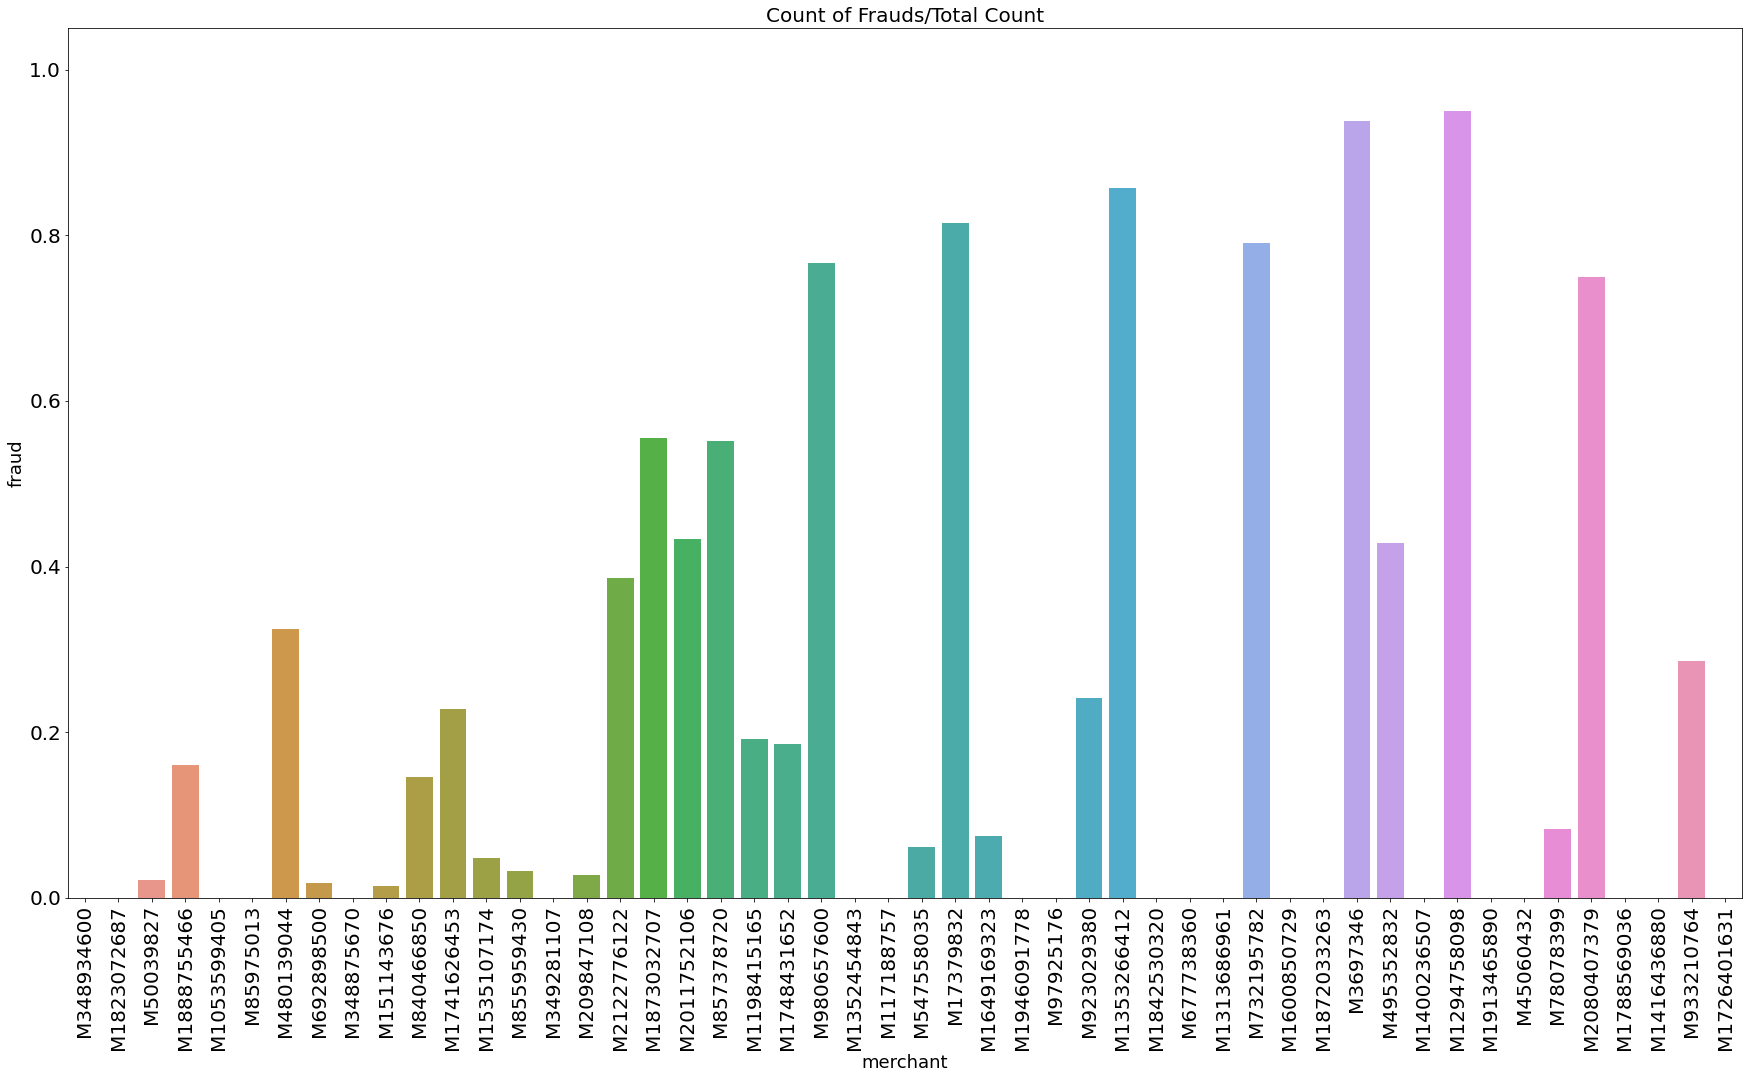

In [17]:
plot_ratio(dataset, 'merchant' ,'fraud' , 'Count of Frauds/Total Count', width=10 ,ht=8)

# Data Analysis for Category

### Transacton Count based on Category

Category *transportation*  shares about 85% of the total transactions , when compared with Frauds per Transactions the rest of the Categories *Leisure* and *Travel* have a higher ratio of frauds. 

C:\Users\a7gupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


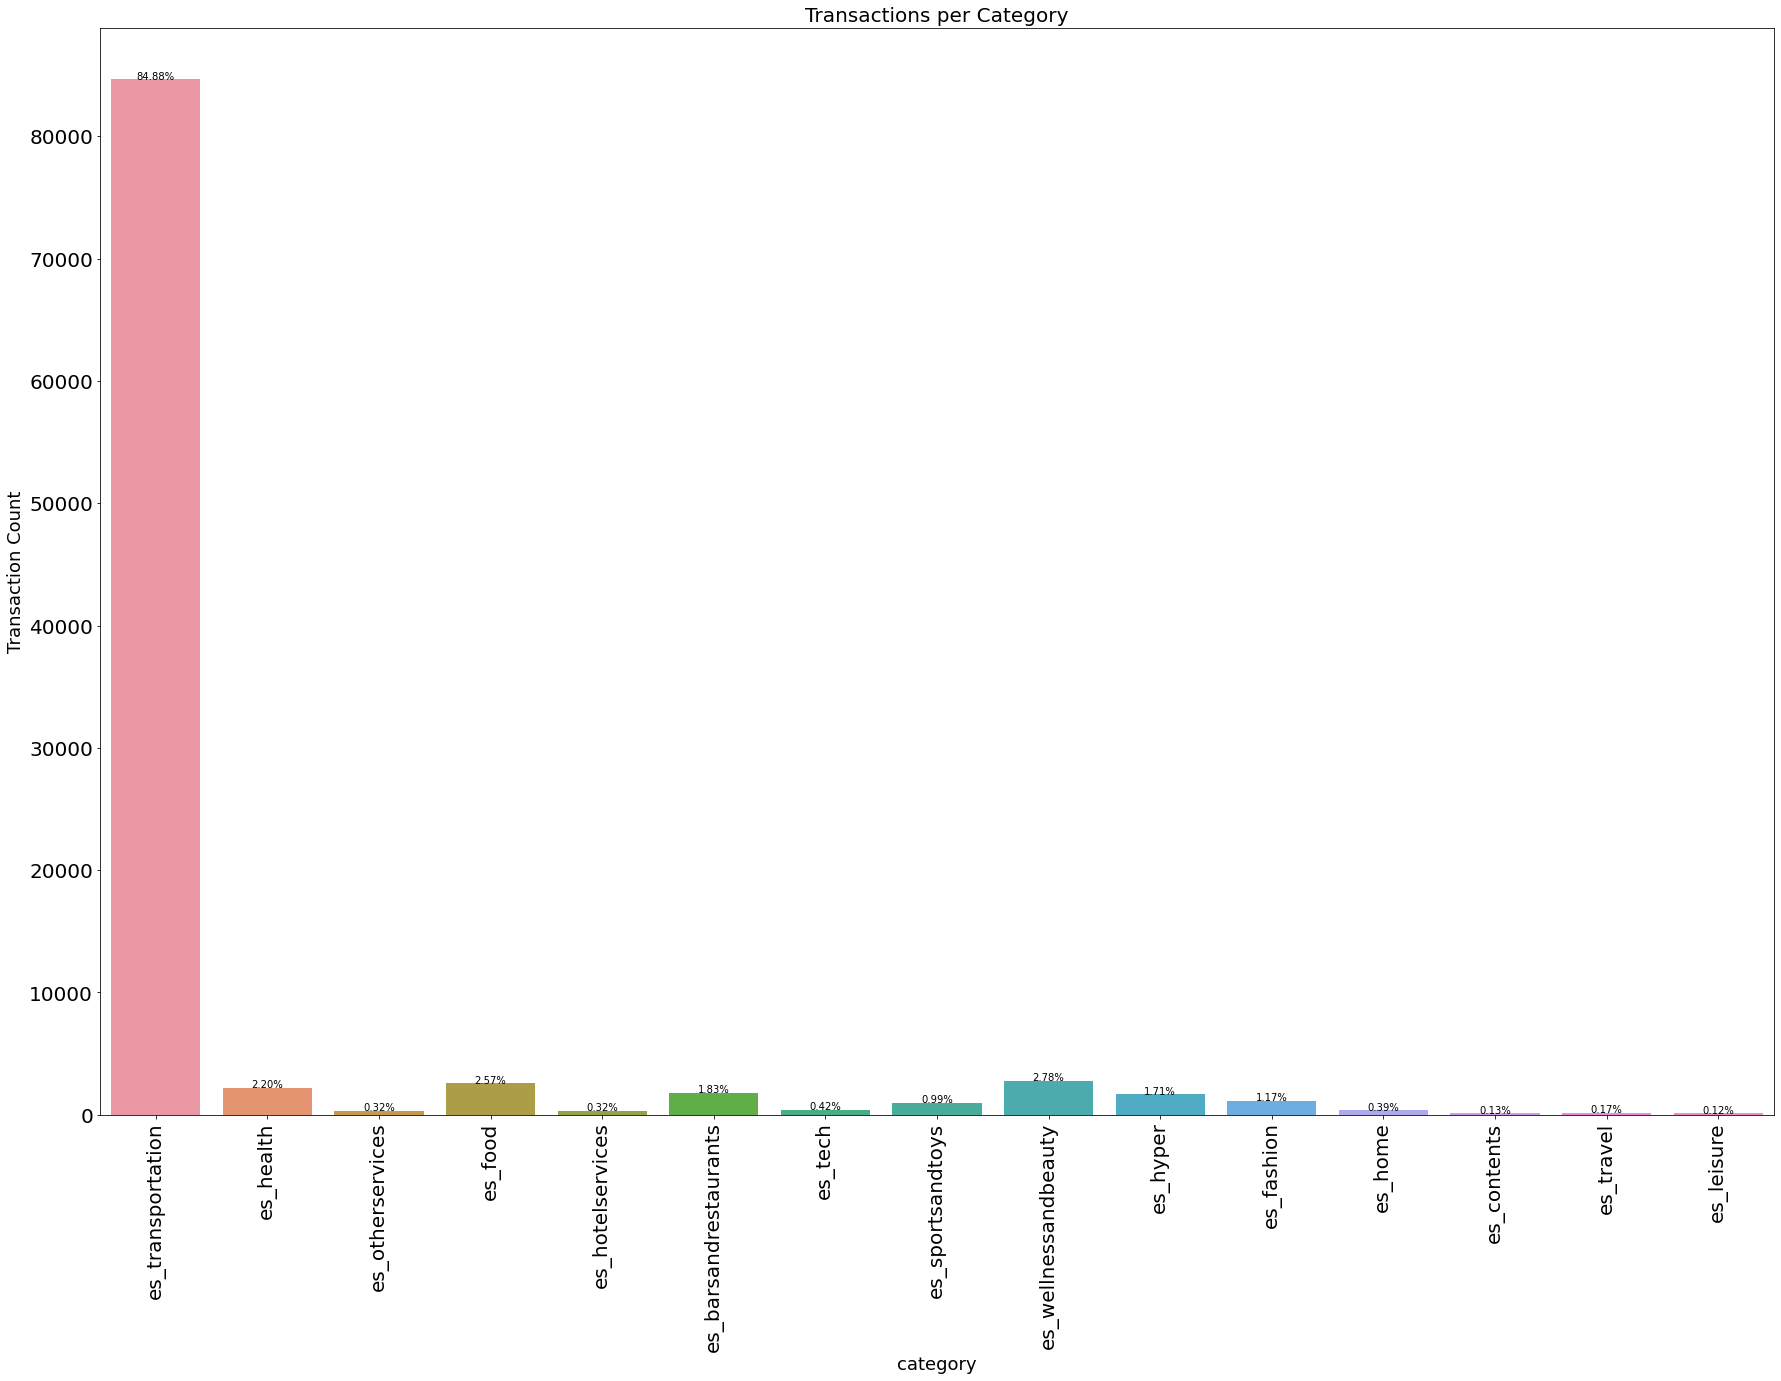

In [19]:
plot_count(dataset, 'category', 'Transactions per Category',width=10 ,ht=10)

Count of Frauds/Total Count

### Ratio of Fraud Counts to Total transaction Count for Merchants


C:\Users\a7gupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


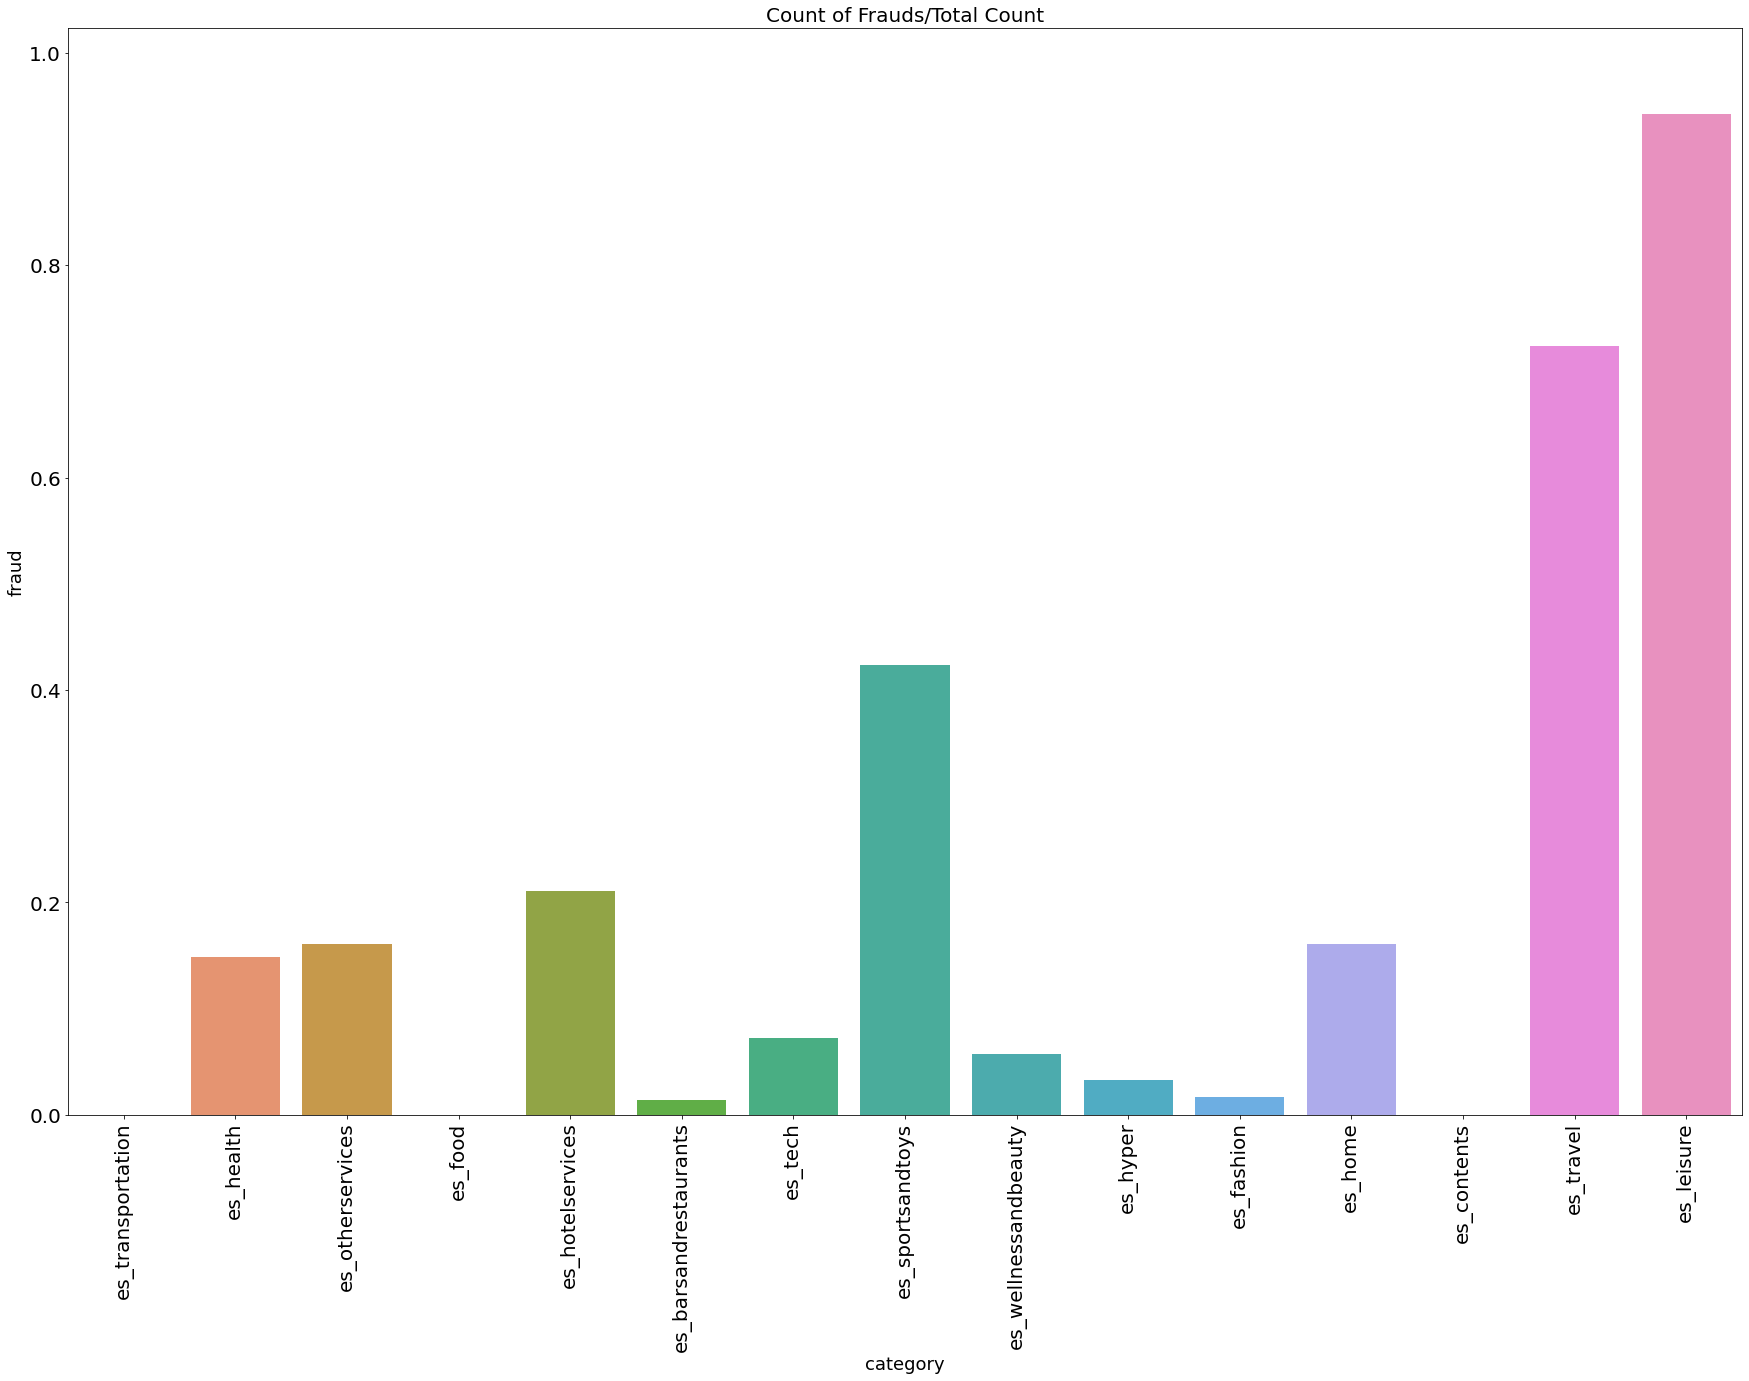

In [20]:
plot_ratio(dataset, 'category' ,'fraud' , 'Count of Frauds/Total Count', width=10 ,ht=8)


# Data Analysis for AGE

### Transacton Count based on AB

From the barplots below its clear that age goup 2,3,4 (26 yrs to 55 yrs)  have a higher percentage of total transactions and age group 0 ( 0 yr to  18 yrs) do the least transactions.
The age group 0-18 has the maximum ratio of frauds

C:\Users\a7gupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


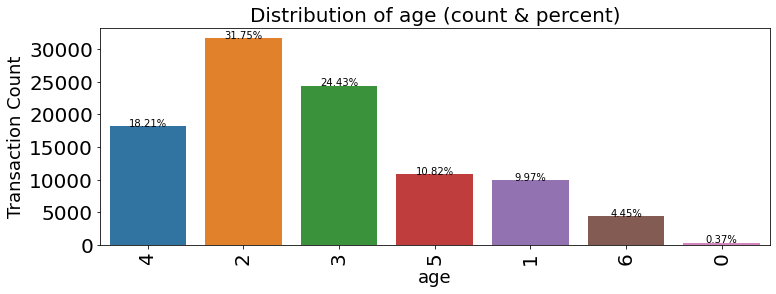

In [21]:
plot_count(dataset, 'age', 'Distribution of age (count & percent)',  width=4 ,ht=2)

### Ratio of Fraud Counts to Total transaction Count for AGE groups

C:\Users\a7gupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


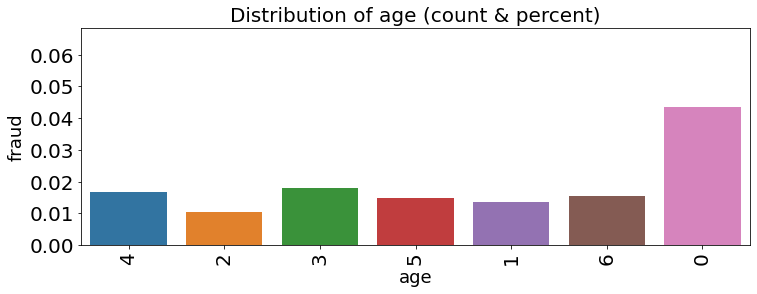

In [22]:
plot_ratio(dataset, 'age' ,'fraud' , 'Distribution of age (count & percent)', width=4 ,ht=2)

# Data Analysis for STEP/DAY Number

### Transacton Count based on Step

Almost all days shpw similar number trend of transactions and there is a slight increase in the count. The ratio of frauds to transactions also has a similar case but with a slight decrease in frauds.
As neither the day number nor the day of the week has a deciding factor on the dependent variable removing this variable.

C:\Users\a7gupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


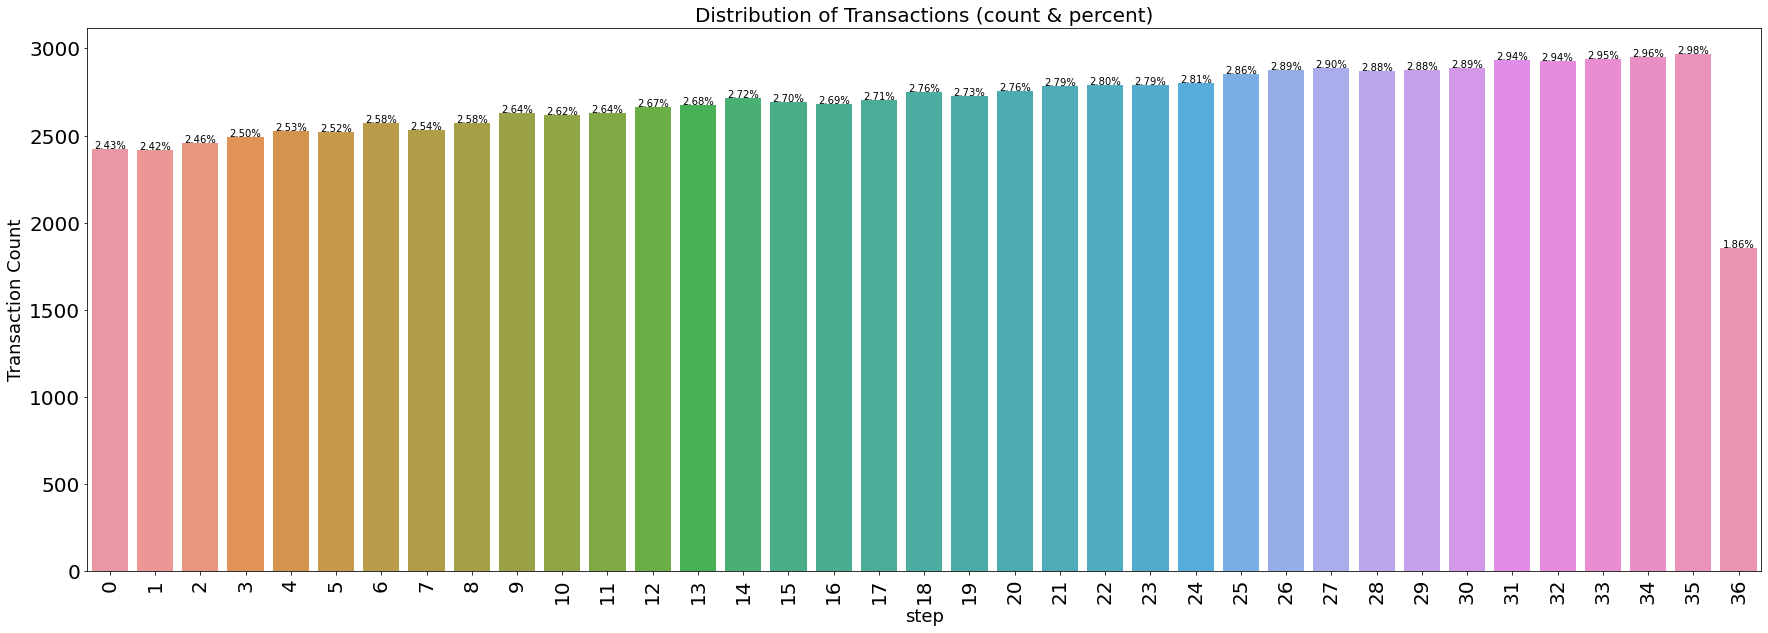

In [23]:
plot_count(dataset, 'step', 'Distribution of Transactions (count & percent)',  width=10 ,ht=5)

### Ratio of Fraud Counts to Total transaction Count for STEP

C:\Users\a7gupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


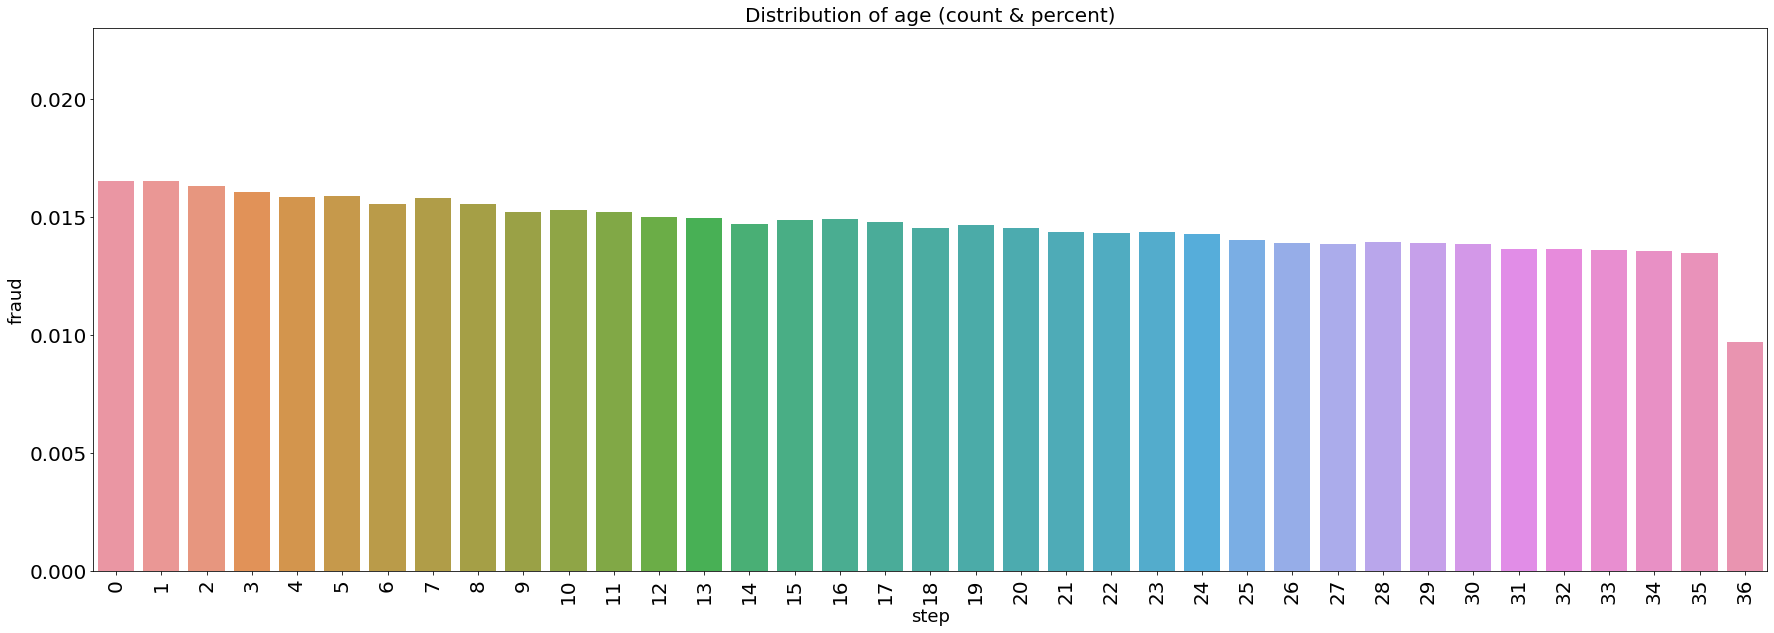

In [24]:
plot_ratio(dataset, 'step' ,'fraud' , 'Distribution of age (count & percent)', width=10 ,ht=5)

#### Removing step from dataset

In [25]:
dataset= dataset.drop(['step'] , axis=1)
dataset.head()

,customer,age,gender,merchant,category,amount,fraud
0,C1093826151,4,M,M348934600,es_transportation,4.55,0
1,C352968107,2,M,M348934600,es_transportation,39.68,0
2,C2054744914,4,F,M1823072687,es_transportation,26.89,0
3,C1760612790,3,M,M348934600,es_transportation,17.25,0
4,C757503768,5,M,M348934600,es_transportation,35.72,0


### Splitting the data set ant DEPENDENT (Y) and INDIPENDENT variables

In [26]:
X=dataset.iloc[:, :-1].values
Y=dataset.iloc[:,-1].values

### Encoding Category , Customer , Merchant and Scaling Amount


In [27]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Y=dataset.iloc[:,-1].values

encoder_dict = defaultdict(LabelEncoder)
labeled_df = dataset.iloc[:,0:5].apply(lambda x: encoder_dict[x.name].fit_transform(x))
labeled_df['amount'] = dataset.iloc[:,5]
X = labeled_df.values
X[:,[5]] = sc.fit_transform(X[:,[5]])

#  Metrics' Optimization and Training

Chossing Classifier models as this is a decision based on multiple features and end result needs to lie in a range/needs to be classified into the category of true and false  i.e. if the transaction is a fraud transaction or not 

### Splitting data into test data and train data with a split of 30% to test data and 70% to train the model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=1,shuffle=True,stratify=Y)

## DECISION TREE

#### Accuracy : 99.1 % || Root Mean Square Error : 9.01%

0.9914110019383731
RMSE :  0.092677


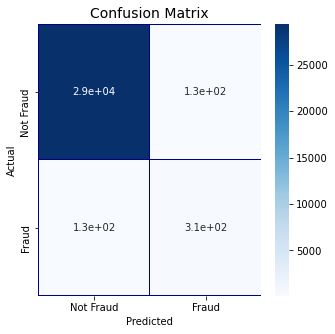

In [29]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
rmse = np.sqrt(MSE(y_test, y_pred)) 
print("RMSE : % f" %(rmse))

# confusion matrix
cm = pd.crosstab(y_test.reshape(-1), y_pred.reshape(-1), rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# KNN : K Nearest Neighbour

#### Accuracy : 98.8 % || Root Mean Square Error : 10.8%

[[29432    53]
 [  306   131]]
0.988002138894459
RMSE :  0.109535


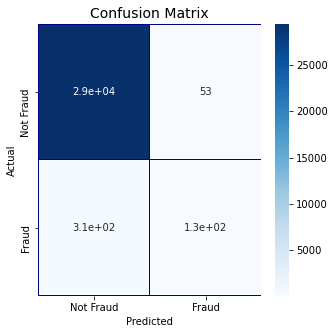

In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
rmse = np.sqrt(MSE(y_test, y_pred)) 
print("RMSE : % f" %(rmse))

cm = pd.crosstab(y_test.reshape(-1), y_pred.reshape(-1), rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# SVC : Support Vector Classifier 

#### Accuracy : 98.5 % || Root Mean Square Error : 12.06%

[[29485     0]
 [  437     0]]
0.9853953612726422
RMSE :  0.120850


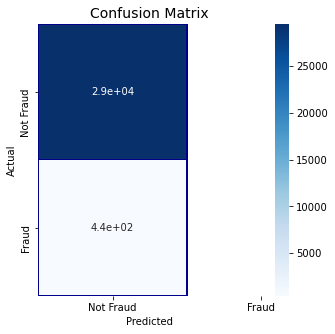

In [115]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier=classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
rmse = np.sqrt(MSE(y_test, y_pred)) 
print("RMSE : % f" %(rmse))

cm = pd.crosstab(y_test.reshape(-1), y_pred.reshape(-1), rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# RANDOM FOREST

#### Accuracy : 99.4 % || Root Mean Square Error : 7.5%

[[29440    45]
 [  136   301]]
0.9939509391083484
RMSE :  0.077776


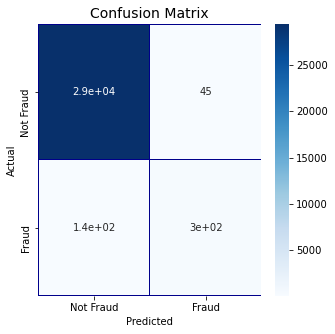

In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
rmse = np.sqrt(MSE(y_test, y_pred)) 
print("RMSE : % f" %(rmse))

cm = pd.crosstab(y_test.reshape(-1), y_pred.reshape(-1), rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# NAIVE BAYES

#### Accuracy : 98.4 % || Root Mean Square Error : 12.4%

[[29093   392]
 [  100   337]]
0.9835572488470022
RMSE :  0.128229


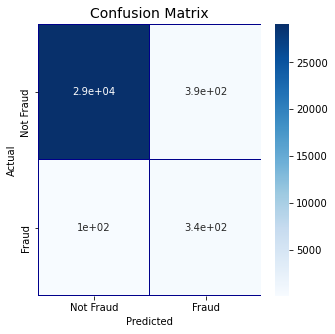

In [32]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
rmse = np.sqrt(MSE(y_test, y_pred)) 
print("RMSE : % f" %(rmse))

cm = pd.crosstab(y_test.reshape(-1), y_pred.reshape(-1), rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# XGBoost

#### Accuracy : 99.4 % || Root Mean Square Error : 7.4%

[14:59:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[[29449    36]
 [  137   300]]
0.9942183009157142
RMSE :  0.076037


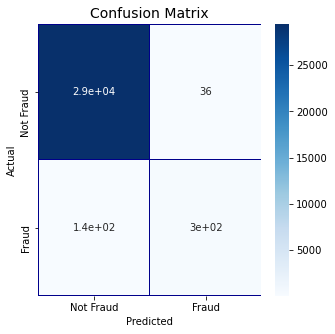

In [33]:
import xgboost as xgb
XGBoost_CLF = xgb.XGBClassifier(max_depth=6, learning_rate=0.05, n_estimators=400, 
                                objective="binary:hinge", booster='gbtree', 
                                n_jobs=-1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, 
                                subsample=1, colsample_bytree=0.05, colsample_bylevel=0.05, reg_alpha=0, reg_lambda=1, 
                                scale_pos_weight=1, base_score=0.5, random_state=42)

XGBoost_CLF.fit(X_train,y_train)

y_pred = XGBoost_CLF.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
rmse = np.sqrt(MSE(y_test, y_pred)) 
print("RMSE : % f" %(rmse))

cm = pd.crosstab(y_test.reshape(-1), y_pred.reshape(-1), rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# Lightgbm

#### Accuracy : 99.4 % || Root Mean Square Error : 7.4%

In [34]:
import lightgbm as lgb
train_data=lgb.Dataset(X_train,label=y_train)
param = {'num_leaves':100, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':500}
param['metric'] = ['auc', 'binary_logloss']
num_round=500
lgbm=lgb.train(param,train_data,num_round)
y_pred=lgbm.predict(X_test)
#rounding the values
y_pred=y_pred.round(0)
#converting from float to integer
y_pred=y_pred.astype(int)
 
accuracy_lgbm = accuracy_score(y_test,y_pred.round())
print(accuracy_lgbm)
 
accuracy = accuracy_score(y_test,y_pred.round())
print("Accuracy = "+str(accuracy))
rmse = np.sqrt(MSE(y_test, y_pred)) 
print("RMSE : % f" %(rmse))

[LightGBM] [Info] Number of positive: 1021, number of negative: 68794
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 69815, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.014624 -> initscore=-4.210334
[LightGBM] [Info] Start training from score -4.210334
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

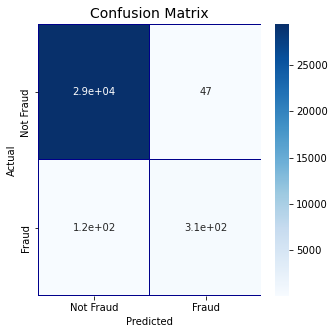

In [120]:
cm = pd.crosstab(y_test.reshape(-1), y_pred.reshape(-1), rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# Conclusion

From the above observations its obsserved that XGboost and Lightgbm have the highest accuracy when comapred to rest of the classifiers.

### XGboost & Lightgbm :
The accuracy for XGboost is high but it takes a lot of time to process when compared to Lightgbm. For this project we have decided to go with Lightgbm as our model and have created the UI based on this

The API can call all 3 best performing models i.e. : XGBoost , Lightgbm and RandomForest